In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
source('tests.R')
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [1]:
something

ERROR: Error in eval(expr, envir, enclos): object 'something' not found


In [18]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                  col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
                col_types = list("d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "d", "f", "f", "d"))
cleveland_data
cleveland_data[ cleveland_data == "?" ] <- NA

cleveland_clean <- cleveland_data %>%
                    mutate(diag = ifelse(is.na(num), NA, (num > 0))) %>%
                    mutate(sex = as.factor(as.integer(sex)), cp = as.factor(as.integer(cp)), 
                           fbs = as.factor(as.integer(fbs)), restecg = as.factor(as.integer(restecg)),
                           exang = as.factor(as.integer(exang)), thal = as.factor(as.integer(thal)),
                           ca = as.factor(as.integer(ca)), slope = as.factor(as.integer(slope)))

#splitting dataframe into training, testing datasets
cleveland_split <- initial_split(cleveland_clean, prop = 3/4, strata = num)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

cleveland_training
cleveland_testing

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
63,1,1,145,233,1,2,150,0,2.3,3,1,1,0,FALSE
37,1,3,130,250,0,0,187,0,3.5,3,1,2,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,1,2,0,FALSE
57,1,4,140,192,0,0,148,0,0.4,2,1,1,0,FALSE
56,0,2,140,294,0,2,153,0,1.3,2,1,2,0,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
52,1,4,125,212,0,0,168,0,1.0,1,3,3,3,TRUE
58,0,2,136,319,1,2,152,0,0.0,1,3,2,3,TRUE
55,0,4,128,205,0,1,130,1,2.0,2,4,3,3,TRUE


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
41,0,2,130,204,0,2,172,0,1.4,1,1,2,0,FALSE
62,0,4,140,268,0,2,160,0,3.6,3,3,2,3,TRUE
57,0,4,120,354,0,0,163,1,0.6,1,1,2,0,FALSE
54,1,4,140,239,0,0,160,0,1.2,1,1,2,0,FALSE
48,0,3,130,275,0,0,139,0,0.2,1,1,2,0,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
44,1,4,120,169,0,0,144,1,2.8,3,1,1,2,TRUE
63,0,4,124,197,0,0,136,1,0.0,2,1,2,1,TRUE
59,1,4,164,176,1,2,90,0,1.0,2,3,1,3,TRUE


Method

In [19]:
cleveland_summary <- cleveland_training %>%
                    group_by(diag) %>%
                    summarize(min_age = min(age), max_age = max(age), mean_age = mean(age),
                              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol), 
                              min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach),
                              n_of_patients = n())

cleveland_summary

diag,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,min_thalach,max_thalach,mean_thalach,n_of_patients
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,34,76,52.60976,126,564,243.8293,96,194,158.8618,123
TRUE,35,77,56.70874,131,409,252.8350,88,195,140.6505,103


Plotting

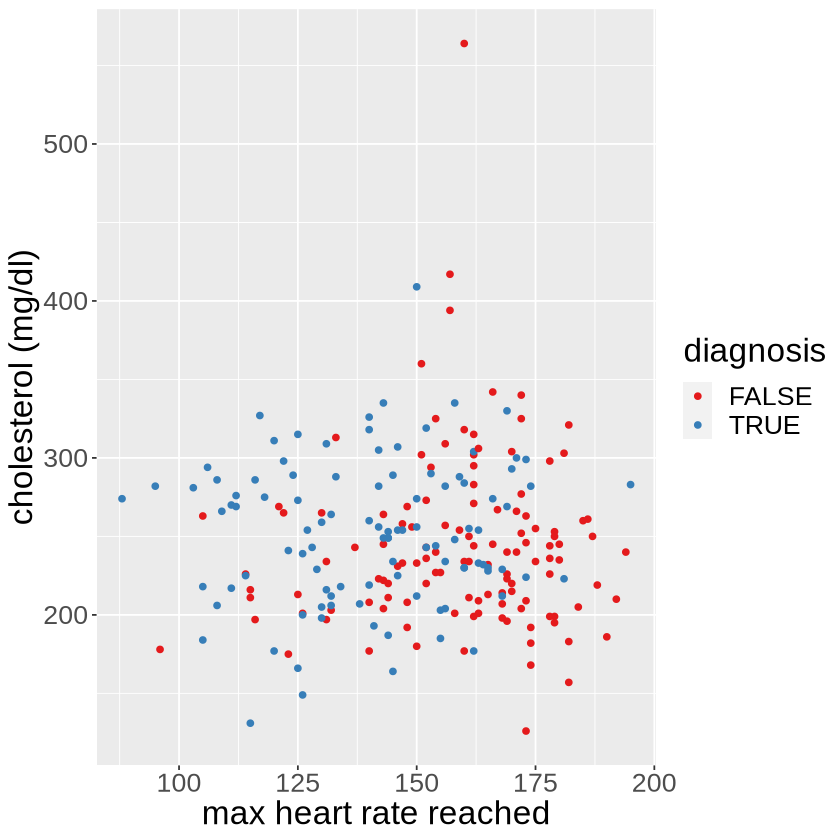

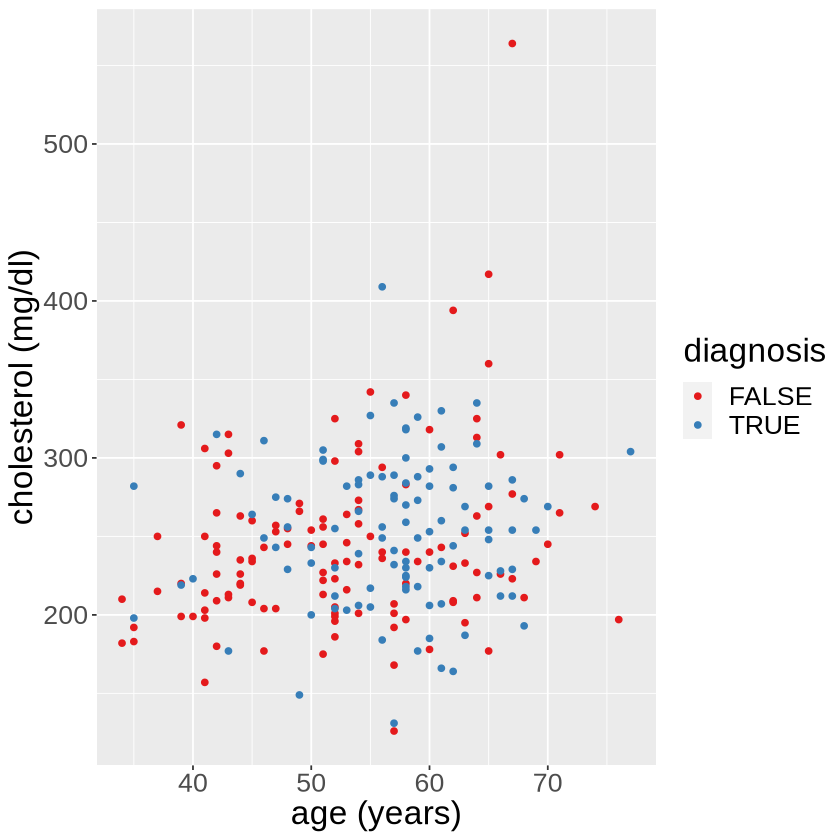

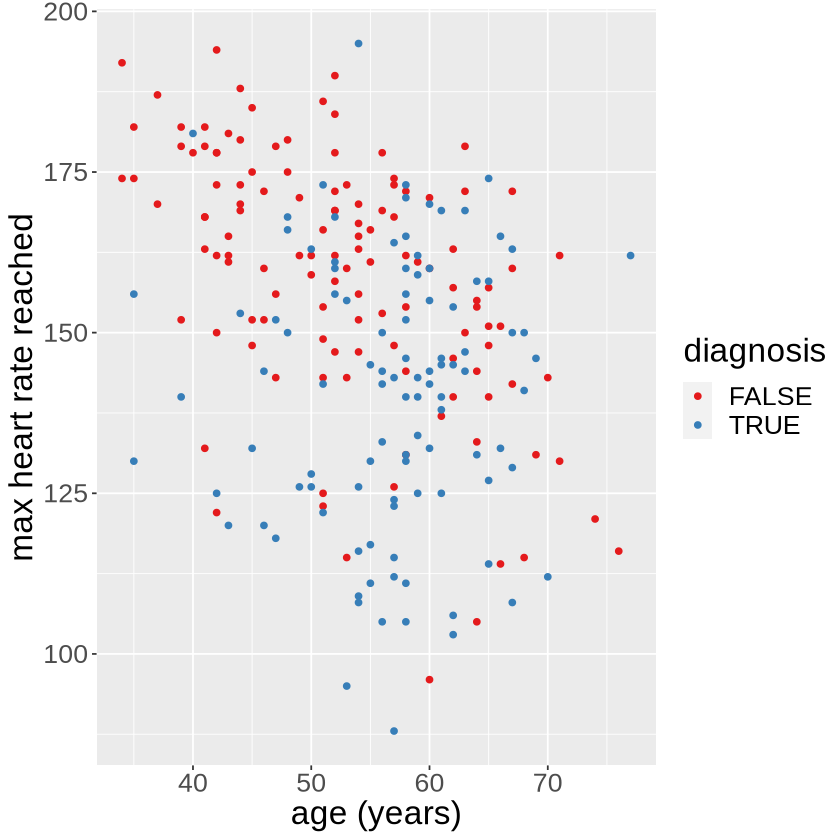

In [22]:

plot1 <- ggplot(cleveland_training, aes(x = thalach, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1") +
                 theme(text = element_text(size = 20))

plot2 <- ggplot(cleveland_training, aes(x = age, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "age (years)", y = "cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1") +
                 theme(text = element_text(size = 20))

plot3 <- ggplot(cleveland_training, aes(x = age, y = thalach, color = diag)) +
                 geom_point() +
                 labs(x = "age (years)", y = "max heart rate reached", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1") +
                 theme(text = element_text(size = 20))

plot1
plot2
plot3